In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [14]:
!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [15]:
from matplotlib import font_manager

font_manager.findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquare_acB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquare_acL.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquare_acR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype

In [21]:
# 초기설정
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] ='NanumGothic'

fe = font_manager.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
font_manager.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

import warnings
warnings.simplefilter('ignore')

In [4]:
# 샘플 데이터 선언
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [5]:
# 머신러닝 모델에서 사용하기 위해 신장을 x, 체중을 y로
x = sampleData1[:,0]
y = sampleData1[:,1]

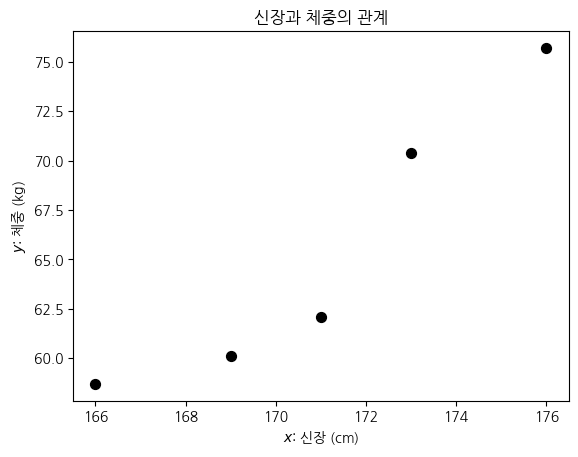

In [22]:
# 산포도 출력 확인
plt.scatter(x, y, c='k', s=50)
plt.xlabel('$x$: 신장 (cm)')
plt.ylabel('$y$: 체중 (kg)')
plt.title('신장과 체중의 관계')
plt.show()

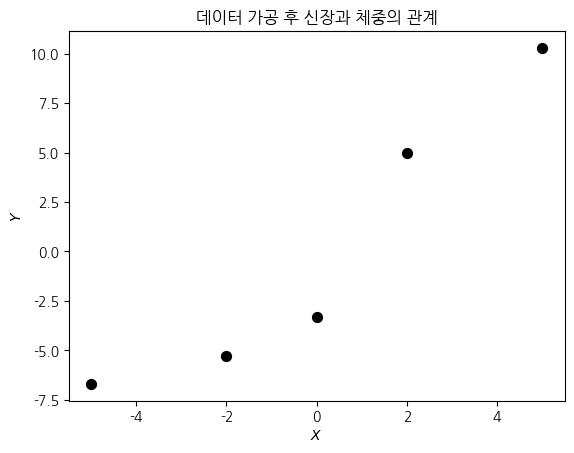

In [23]:
X = x - x.mean()
Y = y - y.mean()

plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('데이터 가공 후 신장과 체중의 관계')
plt.show()

In [24]:
# X와 Y를 텐서 변수로 변환
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [26]:
# 파라미터 정의
# W와 B는 경사 계산을 위해, requires_grad=True로 설정
# 초기값 1로 설정
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [27]:
# 예측 함수
def pred(X):
  return W * X + B

In [29]:
# 예측 값 계산
Yp = pred(X)

# 결과 확인
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


In [30]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

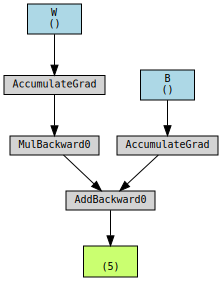

In [32]:
from torchviz import make_dot

# 예측 값의 계산 그래프 표시
params = {'W': W, 'B': B}

g = make_dot(Yp, params=params)
display(g)

In [33]:
# 평균 제곱 오차 손실 함수(mse) 정의

def mse(Yp, Y):
  loss = ((Yp - Y) ** 2).mean()
  return loss

In [34]:
# 손실 계산
loss = mse(Yp, Y)

print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


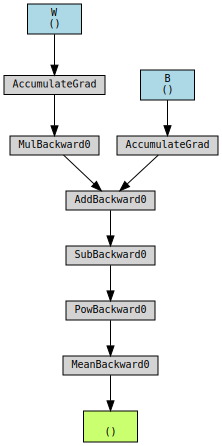

In [36]:
# 손실 계산 그래프 출력
# 손실은 예측함수와 손실함수의 합성함수. 예측 함수의 이동을 결정 짓는 파라미터(W, B)의 함수
params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

In [37]:
# 경사 계산
loss.backward()

In [38]:
# 경삿값 확인
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [44]:
# 학습률 lr을 곱한 결과를 원래의 파라미터 값에서 빼는 것이 경사 하강법의 기본
lr = 0.001

# 경사를 기반으로 파라미터 수정
with torch.no_grad(): # 계산 그래프 생성 기능을 막아 W,B 수정이 가능하게
  W -= lr * W.grad
  B -= lr * B.grad

  # 계산이 끝난 경사값을 초기화
  W.grad.zero_()
  B.grad.zero_()

In [45]:
# 파라미터와 경삿값 확인
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0571, requires_grad=True)
tensor(0.9940, requires_grad=True)
tensor(0.)
tensor(0.)


# 반복계산

In [46]:
############# 초기화
# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [49]:
############# 루프 처리
for epoch in range(num_epochs):
  # 예측 계산
  Yp = pred(X)

  # 손실 계산
  loss = mse(Yp, Y)

  # 경사 계산
  loss.backward()

  with torch.no_grad():
    # 파라미터 수정
    W -= lr * W.grad
    B -= lr * B.grad

    # 경삿값 초기화
    W.grad.zero_()
    B.grad.zero_()

  # 손실 기록
  if (epoch % 10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [51]:
print(history)

[[  0.          13.35200214]
 [ 10.          10.38550854]
 [ 20.           8.51729107]
 [ 30.           7.33638239]
 [ 40.           6.58576679]
 [ 50.           6.10470676]
 [ 60.           5.79266453]
 [ 70.           5.58675766]
 [ 80.           5.44764376]
 [ 90.           5.35070324]
 [100.           5.28052711]
 [110.           5.22746277]
 [120.           5.18545818]
 [130.           5.1507163 ]
 [140.           5.12084818]
 [150.           5.09434891]
 [160.           5.07026148]
 [170.           5.0479784 ]
 [180.           5.02710724]
 [190.           5.00739002]
 [200.           4.98865747]
 [210.           4.97079039]
 [220.           4.9537077 ]
 [230.           4.93734646]
 [240.           4.92165995]
 [250.           4.90660906]
 [260.           4.89216042]
 [270.           4.87828779]
 [280.           4.86496401]
 [290.           4.85216761]
 [300.           4.83987331]
 [310.           4.82806396]
 [320.           4.8167181 ]
 [330.           4.80581856]
 [340.        

In [50]:
############# 결과 평가
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태: 손실 :{history[0,1]:.4f}')
print(f'최종상태: 손실 :{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
초기상태: 손실 :13.3520
최종상태: 손실 :4.6796


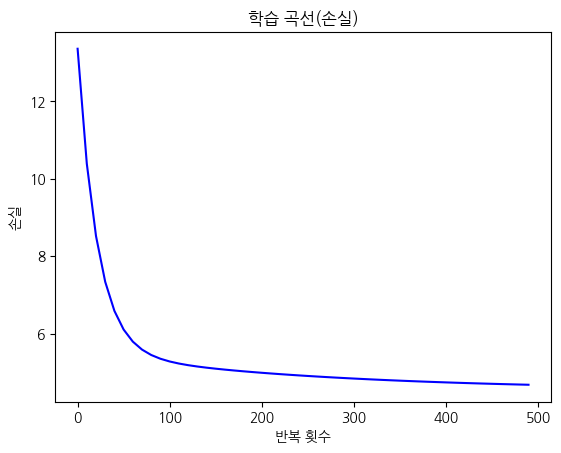

In [52]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

# 최적화

In [54]:
############# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer로 SGD(확률적 경사 하강법) 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [55]:
############# 루프 처리
for epoch in range(num_epochs):
  # 예측 계산
  Yp = pred(X)

  # 손실 계산
  loss = mse(Yp, Y)

  # 경사 계산
  loss.backward()

  # 파라미터 수정
  optimizer.step()

  # 경삿값 초기화
  optimizer.zero_grad()

  # 손실 기록
  if (epoch % 10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [56]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태: 손실 :{history[0,1]:.4f}')
print(f'최종상태: 손실 :{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
초기상태: 손실 :13.3520
최종상태: 손실 :4.6796


## 최적화 함수 튜닝

In [57]:
############# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer로 SGD(확률적 경사 하강법) 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

# history 기록을 위한 배열 초기화
history2 = np.zeros((0, 2))

In [59]:
############# 루프 처리
for epoch in range(num_epochs):
  # 예측 계산
  Yp = pred(X)

  # 손실 계산
  loss = mse(Yp, Y)

  # 경사 계산
  loss.backward()

  # 파라미터 수정
  optimizer.step()

  # 경삿값 초기화
  optimizer.zero_grad()

  # 손실 기록
  if (epoch % 10 == 0):
    item = np.array([epoch, loss.item()])
    history2 = np.vstack((history2, item))
    print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 5.7585
epoch = 20 loss = 5.9541
epoch = 30 loss = 5.0276
epoch = 40 loss = 4.8578
epoch = 50 loss = 4.7052
epoch = 60 loss = 4.6327
epoch = 70 loss = 4.5940
epoch = 80 loss = 4.5698
epoch = 90 loss = 4.5574
epoch = 100 loss = 4.5495
epoch = 110 loss = 4.5452
epoch = 120 loss = 4.5426
epoch = 130 loss = 4.5411
epoch = 140 loss = 4.5403
epoch = 150 loss = 4.5398
epoch = 160 loss = 4.5395
epoch = 170 loss = 4.5393
epoch = 180 loss = 4.5392
epoch = 190 loss = 4.5391
epoch = 200 loss = 4.5391
epoch = 210 loss = 4.5391
epoch = 220 loss = 4.5391
epoch = 230 loss = 4.5390
epoch = 240 loss = 4.5390
epoch = 250 loss = 4.5390
epoch = 260 loss = 4.5390
epoch = 270 loss = 4.5390
epoch = 280 loss = 4.5390
epoch = 290 loss = 4.5390
epoch = 300 loss = 4.5390
epoch = 310 loss = 4.5390
epoch = 320 loss = 4.5390
epoch = 330 loss = 4.5390
epoch = 340 loss = 4.5390
epoch = 350 loss = 4.5390
epoch = 360 loss = 4.5390
epoch = 370 loss = 4.5390
epoch = 380 loss = 4.5

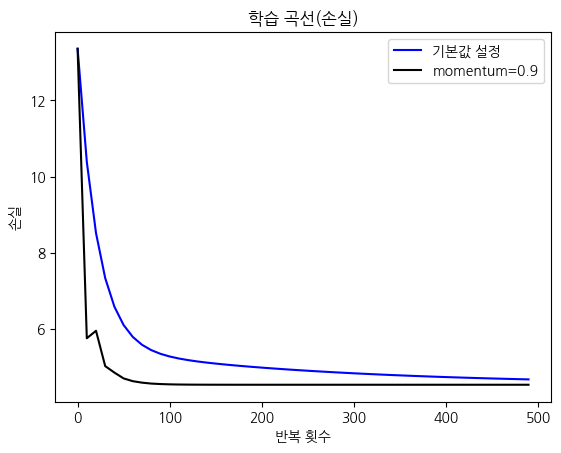

In [60]:
# 학습 곡선(손실) 출력
plt.plot(history[:,0], history[:,1], 'b', label='기본값 설정')
plt.plot(history2[:,0], history2[:,1], 'k', label='momentum=0.9')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.legend()
plt.title('학습 곡선(손실)')
plt.show()